In [1]:
import csv, random
import numpy as np
from numpy import genfromtxt

Implementation of GPflow (Hemsmen et al., 2014)(Multivariate output)

In [2]:
import gpflow, GPy, sys
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

/Applications/anaconda3/lib/python3.6/site-packages/multipledispatch/dispatcher.py:24: AmbiguityWarning: 
Ambiguities exist in dispatched function _expectation

The following signatures may result in ambiguous behavior:
	[Gaussian, Identity, NoneType, Kernel, InducingPoints], [Gaussian, Linear, NoneType, Sum, InducingPoints]


Consider making the following additions:

@dispatch(Gaussian, Identity, NoneType, Sum, InducingPoints)
def _expectation(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)


In [3]:
import pandas as pd
data = pd.read_csv("istanbul_stock_exchange.csv")

In [4]:
data
df1 = data.iloc[2:] 

In [5]:
Original_dataset = df1.drop(df1.columns[0], axis=1)

In [6]:
df3 = Original_dataset.drop(Original_dataset.columns[0:2], axis = 1)

In [7]:
df3

,imkb_x,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
2,0.007786738,0.008455341,0.012865611,0.004162452,0.01891958,0.011340652,0.008772644
3,-0.030469134,-0.017833062,-0.028734593,0.017292932,-0.035898576,-0.017072795,-0.020015412
4,0.003391364,-0.011726277,-0.000465999,-0.040061309,0.028283152,-0.005560959,-0.019423778
5,-0.021533208,-0.019872754,-0.012709717,-0.004473502,-0.00976388,-0.010988634,-0.007802212
6,-0.022822626,-0.013525735,-0.005025533,-0.049038532,-0.053849474,-0.012451259,-0.022629745
7,0.001756552,-0.017673622,-0.006141454,0,0.00357202,-0.012220196,-0.004827138
8,-0.034032484,-0.047383437,-0.050945198,0.002912354,-0.040301613,-0.045220199,-0.008676646
9,0.001328305,-0.019550621,-0.014334659,-0.050447588,0.030313602,-0.012070424,-0.023428729
10,0.007533126,0.00679078,0.006289177,0.025453186,0.004866686,0.008560858,0.010916893
11,-0.054261984,-0.011549904,-0.009351296,0.003238918,-0.013151015,-0.012045182,-0.004029004


In [8]:
X = df3.values.astype(np.float)

In [9]:
df4 = Original_dataset.drop(Original_dataset.columns[2:], axis = 1)

In [10]:
df4

,TL BASED,USD BASED
2,0.025425873,0.031812743
3,-0.02886173,-0.026352966
4,-0.062208079,-0.084715902
5,0.009859905,0.009658112
6,-0.029191028,-0.042361155
7,0.015445348,-0.000272183
8,-0.041167612,-0.03555248
9,0.000661905,-0.017267844
10,0.022037345,0.032278032
11,-0.022692465,-0.044348781


In [11]:
y = df4.values.astype(np.float)

In [12]:
y

array([[ 0.02542587,  0.03181274],
       [-0.02886173, -0.02635297],
       [-0.06220808, -0.0847159 ],
       ..., 
       [ 0.00019097, -0.0016526 ],
       [-0.01306904, -0.01370599],
       [-0.00724632, -0.01944185]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)

In [ ]:
#For test 2
np.savetxt('istanbul_train_X.csv',X_train,delimiter=",")
np.savetxt('istanbul_train_Y.csv',y_train,delimiter=",")
np.savetxt('istanbul_test_X.csv',X_test,delimiter=",")
np.savetxt('istanbul_test_Y.csv',y_test,delimiter=",")

In [ ]:
X_train

In [47]:
import gpflow, GPy, sys

In [48]:
# Setup the experiment and plotting.
Ms = [4, 8, 16, 32, 64]

# Run sparse classification with increasing number of inducing points
models = []
for index, num_inducing in enumerate(Ms):
    # kmeans for selecting Z
    from scipy.cluster.vq import kmeans
    Z = kmeans(X_train, num_inducing)[0]

    m = gpflow.models.SVGP(
        X_train, y_train, kern=gpflow.kernels.RBF(2)+gpflow.kernels.White(2),
        likelihood=gpflow.likelihoods.Gaussian(), Z=Z)
    # Initially fix the hyperparameters.
    m.feature.set_trainable(False)
    gpflow.train.ScipyOptimizer(method = 'BFGS').minimize(m, maxiter=1000)

    # Unfix the hyperparameters.
    m.feature.set_trainable(True)
    gpflow.train.ScipyOptimizer(options=dict(maxiter=1000)).minimize(m)
    models.append(m)

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -2390.761152
  Number of iterations: 138
  Number of functions evaluations: 164


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -2390.761152
  Number of iterations: 138
  Number of functions evaluations: 164


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -2402.507023
  Number of iterations: 943
  Number of functions evaluations: 1062


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -2402.507023
  Number of iterations: 943
  Number of functions evaluations: 1062


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -2401.010381
  Number of iterations: 146
  Number of functions evaluations: 195


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -2401.010381
  Number of iterations: 146
  Number of functions evaluations: 195


INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: -2403.956819
  Number of iterations: 1000
  Number of functions evaluations: 1115


INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: -2403.956819
  Number of iterations: 1000
  Number of functions evaluations: 1115


KeyboardInterrupt: 

In [ ]:
# Run variational approximation without sparsity..
# ..be aware that this is much slower for big datasets,
# but relatively quick here.
m = gpflow.models.VGP(X_train, y_train,
                      kern=gpflow.kernels.RBF(7,1),
                      likelihood=gpflow.likelihoods.Gaussian())
gpflow.train.ScipyOptimizer().minimize(m, maxiter=2000)
models.append(m)

In [ ]:
# kmeans for selecting Z
from scipy.cluster.vq import kmeans
Z = kmeans(X_train, 10)[0]

m = gpflow.models.SVGP(
    X_train, y_train, kern=gpflow.kernels.RBF(1)+gpflow.kernels.Matern52(1),
    likelihood=gpflow.likelihoods.Gaussian(), Z=Z)
# Initially fix the hyperparameters.
m.feature.set_trainable(False)
gpflow.train.ScipyOptimizer(method = 'BFGS').minimize(m, maxiter=20)

# Unfix the hyperparameters.
m.feature.set_trainable(True)
gpflow.train.ScipyOptimizer(options=dict(maxiter=200)).minimize(m)


REAL STUFF

In [49]:
%matplotlib inline
import sys
import numpy as np
import numpy.random as rnd
import time
import gpflow
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [50]:
M = 20

In [51]:
def init():
    kern = gpflow.kernels.RBF(X_train.shape[1],1)
    from scipy.cluster.vq import kmeans
    Z = kmeans(X_train, M)[0]
    m = gpflow.models.SVGP(X_train, y_train, kern, gpflow.likelihoods.Gaussian(), Z, minibatch_size=len(X_train))
    return m

m = init()

In [52]:
ground_truth = m.compute_log_likelihood()
m.X.set_batch_size(80)
m.Y.set_batch_size(80)
evals = [m.compute_log_likelihood() for _ in range(80)]

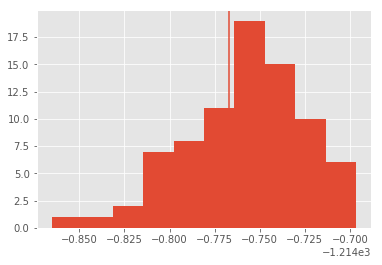

In [53]:
plt.hist(evals)
plt.axvline(ground_truth)

In [54]:
mbps = np.logspace(-2, 0, 10)
times = []
objs = []
for mbp in mbps:
    batchsize = int(len(X) * mbp)
    m.X.set_batch_size(batchsize)
    m.Y.set_batch_size(batchsize)
    start_time = time.time()
    objs.append([m.compute_log_likelihood() for _ in range(20)])
#    plt.hist(objs, bins = 100)
#    plt.axvline(ground_truth, color='r')
    times.append(time.time() - start_time)

Text(0,0.5,'ELBO estimates')

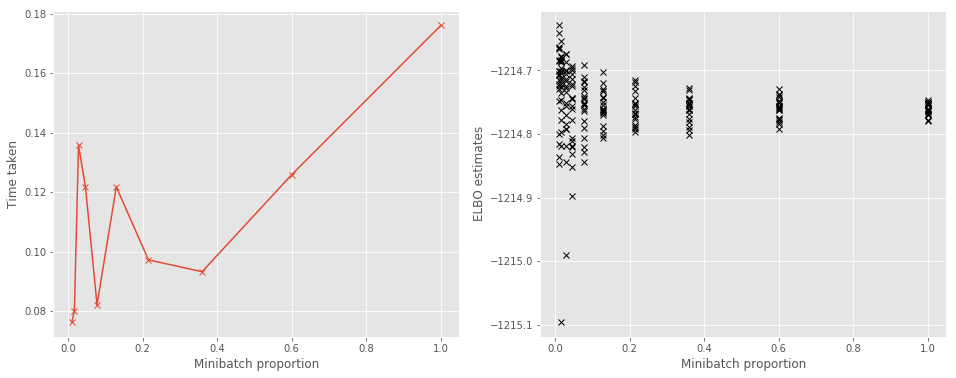

In [55]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(mbps, times, 'x-')
ax1.set_xlabel("Minibatch proportion")
ax1.set_ylabel("Time taken")

ax2.plot(mbps, np.array(objs), 'kx')
ax2.set_xlabel("Minibatch proportion")
ax2.set_ylabel("ELBO estimates")

Running stochastic optimization

In [56]:
def plot():
    pX = np.linspace(-1, 1, 100)[:, None]
    pY, pYv = m.predict_y(pX)
    plt.plot(X, Y, 'x')
    line, = plt.plot(pX, pY, lw=1.5)
    col = line.get_color()
    plt.plot(pX, pY+2*pYv**0.5, col, lw=1.5)
    plt.plot(pX, pY-2*pYv**0.5, col, lw=1.5)
    plt.plot(m.feature.Z.value, np.zeros(m.feature.Z.value.shape), 'k|', mew=2)

plot()
plt.title("Predictions before training")



InvalidArgumentError: Matrix size-incompatible: In[0]: [20,7], In[1]: [100,1]
	 [[Node: autoflow/SVGP/predict_y_2/conditional/MatMul_1 = MatMul[T=DT_DOUBLE, transpose_a=false, transpose_b=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](autoflow/SVGP/predict_y_2/conditional/truediv_2, autoflow/SVGP/predict_y_2/conditional/truediv_3)]]

Caused by op 'autoflow/SVGP/predict_y_2/conditional/MatMul_1', defined at:
  File "/Applications/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Applications/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Applications/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Applications/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Applications/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Applications/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Applications/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-765669d46c9f>", line 11, in <module>
    plot()
  File "<ipython-input-56-765669d46c9f>", line 3, in plot
    pY, pYv = m.predict_y(pX)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/decors.py", line 165, in autoflow_wrapper
    _build_method(method, obj, store)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/decors.py", line 208, in _build_method
    store['result'] = method(obj, *store['arguments'])
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/models/model.py", line 189, in predict_y
    pred_f_mean, pred_f_var = self._build_predict(Xnew)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/decors.py", line 67, in tensor_mode_wrapper
    result = method(obj, *args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/models/svgp.py", line 171, in _build_predict
    white=self.whiten, full_output_cov=full_output_cov)
  File "/Applications/anaconda3/lib/python3.6/site-packages/multipledispatch/dispatcher.py", line 164, in __call__
    return func(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/decors.py", line 49, in name_scope_wrapper
    return method(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/conditionals.py", line 69, in _conditional
    Kmn = Kuf(feat, kern, Xnew)  # M x N
  File "/Applications/anaconda3/lib/python3.6/site-packages/multipledispatch/dispatcher.py", line 164, in __call__
    return func(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/features.py", line 97, in Kuf
    Kzx = kern.K(feat.Z, Xnew)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/decors.py", line 67, in tensor_mode_wrapper
    result = method(obj, *args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/kernels.py", line 313, in K
    return self.variance * tf.exp(-self.scaled_square_dist(X, X2) / 2)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/decors.py", line 67, in tensor_mode_wrapper
    result = method(obj, *args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/kernels.py", line 285, in scaled_square_dist
    dist = -2 * tf.matmul(X, X2, transpose_b=True)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 2022, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2516, in _mat_mul
    name=name)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Matrix size-incompatible: In[0]: [20,7], In[1]: [100,1]
	 [[Node: autoflow/SVGP/predict_y_2/conditional/MatMul_1 = MatMul[T=DT_DOUBLE, transpose_a=false, transpose_b=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](autoflow/SVGP/predict_y_2/conditional/truediv_2, autoflow/SVGP/predict_y_2/conditional/truediv_3)]]


In [57]:
class Logger(gpflow.actions.Action):
    def __init__(self, model):
        self.model = model
        self.logf = []
        
    def run(self, ctx):
        if (ctx.iteration % 10) == 0:
            likelihood = - ctx.session.run(self.model.likelihood_tensor)
            self.logf.append(likelihood)

In [74]:
m.X.set_batch_size(80)
m.Y.set_batch_size(80)

m.feature.trainable = False

def run_adam (model, iterations,var_list=None):
    if var_list is None:
        var_list = [(model.q_mu, model.q_sqrt)]
    model.q_mu.set_trainable(False)
    model.q_sqrt.set_trainable(False)
    adam = gpflow.train.AdamOptimizer().make_optimize_action(model)
    natgrad=gpflow.training.NatGradOptimizer(1).make_optimize_action(model,var_list = var_list)
    logger = Logger(model)
    actions = [adam,natgrad,logger]
    loop = gpflow.actions.Loop(actions, stop=iterations)()
    model.anchor(model.enquire_session())
    return logger

logger = run_adam(m, gpflow.test_util.notebook_niter(2000), var_list=[(m.q_mu, m.q_sqrt)])

Text(0,0.5,'ELBO')

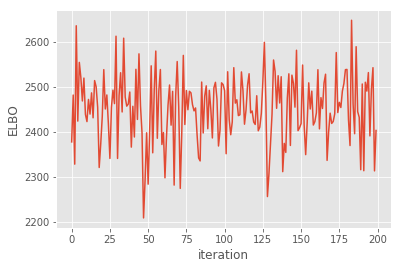

In [75]:
plt.plot(-np.array(logger.logf))
plt.xlabel('iteration')
plt.ylabel('ELBO')

InvalidArgumentError: Matrix size-incompatible: In[0]: [20,7], In[1]: [100,1]
	 [[Node: autoflow/SVGP/predict_y/conditional/MatMul_1 = MatMul[T=DT_DOUBLE, transpose_a=false, transpose_b=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](autoflow/SVGP/predict_y/conditional/truediv_2, autoflow/SVGP/predict_y/conditional/truediv_3)]]

Caused by op 'autoflow/SVGP/predict_y/conditional/MatMul_1', defined at:
  File "/Applications/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Applications/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Applications/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Applications/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Applications/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Applications/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Applications/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-765669d46c9f>", line 11, in <module>
    plot()
  File "<ipython-input-36-765669d46c9f>", line 3, in plot
    pY, pYv = m.predict_y(pX)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/decors.py", line 165, in autoflow_wrapper
    _build_method(method, obj, store)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/decors.py", line 208, in _build_method
    store['result'] = method(obj, *store['arguments'])
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/models/model.py", line 189, in predict_y
    pred_f_mean, pred_f_var = self._build_predict(Xnew)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/decors.py", line 67, in tensor_mode_wrapper
    result = method(obj, *args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/models/svgp.py", line 171, in _build_predict
    white=self.whiten, full_output_cov=full_output_cov)
  File "/Applications/anaconda3/lib/python3.6/site-packages/multipledispatch/dispatcher.py", line 164, in __call__
    return func(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/decors.py", line 49, in name_scope_wrapper
    return method(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/conditionals.py", line 69, in _conditional
    Kmn = Kuf(feat, kern, Xnew)  # M x N
  File "/Applications/anaconda3/lib/python3.6/site-packages/multipledispatch/dispatcher.py", line 164, in __call__
    return func(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/features.py", line 97, in Kuf
    Kzx = kern.K(feat.Z, Xnew)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/decors.py", line 67, in tensor_mode_wrapper
    result = method(obj, *args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/kernels.py", line 313, in K
    return self.variance * tf.exp(-self.scaled_square_dist(X, X2) / 2)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/decors.py", line 67, in tensor_mode_wrapper
    result = method(obj, *args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/kernels.py", line 285, in scaled_square_dist
    dist = -2 * tf.matmul(X, X2, transpose_b=True)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 2022, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2516, in _mat_mul
    name=name)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Matrix size-incompatible: In[0]: [20,7], In[1]: [100,1]
	 [[Node: autoflow/SVGP/predict_y/conditional/MatMul_1 = MatMul[T=DT_DOUBLE, transpose_a=false, transpose_b=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](autoflow/SVGP/predict_y/conditional/truediv_2, autoflow/SVGP/predict_y/conditional/truediv_3)]]


In [66]:
from IPython import display

In [76]:
print(m.kern, '\n\n', m.likelihood, '\n\n----\n')

                            class prior transform  trainable shape  \
SVGP/kern/variance      Parameter  None       +ve       True    ()   
SVGP/kern/lengthscales  Parameter  None       +ve       True    ()   

                        fixed_shape                value  
SVGP/kern/variance             True  0.21163259151168645  
SVGP/kern/lengthscales         True    2.303567060101137   

                               class prior transform  trainable shape  \
SVGP/likelihood/variance  Parameter  None       +ve       True    ()   

                          fixed_shape                   value  
SVGP/likelihood/variance         True  0.00017786496408915155   

----



In [69]:
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
SVGP/kern/variance,Parameter,None,+ve,True,(),True,0.37225356728799863
SVGP/kern/lengthscales,Parameter,None,+ve,True,(),True,1.869089863181605
SVGP/likelihood/variance,Parameter,None,+ve,True,(),True,0.00016379423421591238
SVGP/feature/Z,Parameter,None,(none),False,"(20, 7)",True,"[[0.00352302228571, 0.00646033428571, 0.003250..."
SVGP/q_mu,Parameter,None,(none),True,"(20, 2)",True,"[[0.00396716771608, -0.00261395832657], [-0.05..."
SVGP/q_sqrt,Parameter,None,LoTri->vec,True,"(2, 20, 20)",True,"[[[0.00215049852056, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Univariate Output(TL Based)

In [68]:
Original_dataset

,TL BASED,USD BASED,imkb_x,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
2,0.025425873,0.031812743,0.007786738,0.008455341,0.012865611,0.004162452,0.01891958,0.011340652,0.008772644
3,-0.02886173,-0.026352966,-0.030469134,-0.017833062,-0.028734593,0.017292932,-0.035898576,-0.017072795,-0.020015412
4,-0.062208079,-0.084715902,0.003391364,-0.011726277,-0.000465999,-0.040061309,0.028283152,-0.005560959,-0.019423778
5,0.009859905,0.009658112,-0.021533208,-0.019872754,-0.012709717,-0.004473502,-0.00976388,-0.010988634,-0.007802212
6,-0.029191028,-0.042361155,-0.022822626,-0.013525735,-0.005025533,-0.049038532,-0.053849474,-0.012451259,-0.022629745
7,0.015445348,-0.000272183,0.001756552,-0.017673622,-0.006141454,0,0.00357202,-0.012220196,-0.004827138
8,-0.041167612,-0.03555248,-0.034032484,-0.047383437,-0.050945198,0.002912354,-0.040301613,-0.045220199,-0.008676646
9,0.000661905,-0.017267844,0.001328305,-0.019550621,-0.014334659,-0.050447588,0.030313602,-0.012070424,-0.023428729
10,0.022037345,0.032278032,0.007533126,0.00679078,0.006289177,0.025453186,0.004866686,0.008560858,0.010916893
11,-0.022692465,-0.044348781,-0.054261984,-0.011549904,-0.009351296,0.003238918,-0.013151015,-0.012045182,-0.004029004


In [70]:
df5 = Original_dataset.drop(Original_dataset.columns[1:], axis = 1)

In [71]:
X = df3.values.astype(np.float)